**Importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

**GeoSpatial Analysis**


Loading the csv file


In [ ]:
df_geo = pd.read_csv('/content/Demo Health Facilities Geo Data_NHC.csv')

In [ ]:
df_geo

Facility Type   Latitude  Longitude
0        Hospital   5.593051   3.697007
1        Hospital  10.017569   9.921846
2        Hospital   7.568808  11.178651
3        Hospital  11.574567  12.594135
4        Hospital   6.093634   9.334975
..            ...        ...        ...
762      Pharmacy  11.844224   9.831699
763      Pharmacy   8.228317   8.502529
764      Pharmacy   8.162100   4.821424
765      Pharmacy   7.568452   8.388384
766      Pharmacy   4.330299  10.229440

[767 rows x 3 columns]

Data Exploration of facility Types

In [ ]:
df_geo['Facility Type'].value_counts()

Facility Type
Pharmacy                         627
Primary Care Center              118
Specialized Healthcare Center     12
Hospital                          10
Name: count, dtype: int64

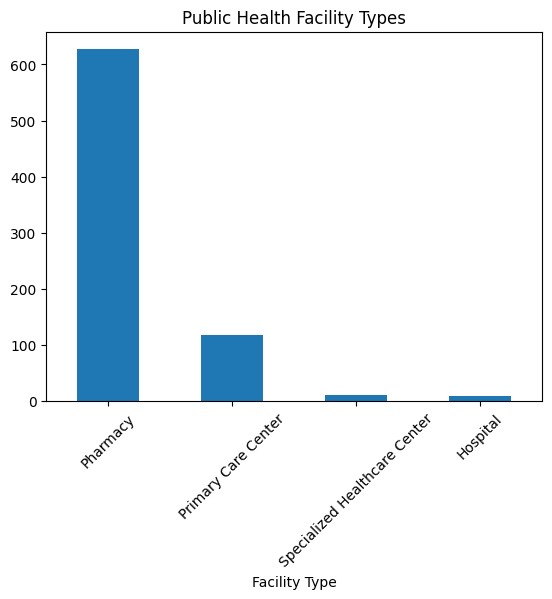

In [ ]:
df_geo['Facility Type'].value_counts().plot(kind='bar')
plt.title('Public Health Facility Types')
plt.xticks(rotation=45)
plt.show()

Coverting the Data to a GeoDataFrame and creating Geopoints

In [ ]:
gdf = gpd.GeoDataFrame(df_geo, geometry= gpd.points_from_xy(df_geo.Longitude, df_geo.Latitude))
gdf

Facility Type   Latitude  Longitude                   geometry
0        Hospital   5.593051   3.697007    POINT (3.69701 5.59305)
1        Hospital  10.017569   9.921846   POINT (9.92185 10.01757)
2        Hospital   7.568808  11.178651   POINT (11.17865 7.56881)
3        Hospital  11.574567  12.594135  POINT (12.59413 11.57457)
4        Hospital   6.093634   9.334975    POINT (9.33497 6.09363)
..            ...        ...        ...                        ...
762      Pharmacy  11.844224   9.831699    POINT (9.8317 11.84422)
763      Pharmacy   8.228317   8.502529    POINT (8.50253 8.22832)
764      Pharmacy   8.162100   4.821424     POINT (4.82142 8.1621)
765      Pharmacy   7.568452   8.388384    POINT (8.38838 7.56845)
766      Pharmacy   4.330299  10.229440    POINT (10.22944 4.3303)

[767 rows x 4 columns]

Graph of the Geopoints

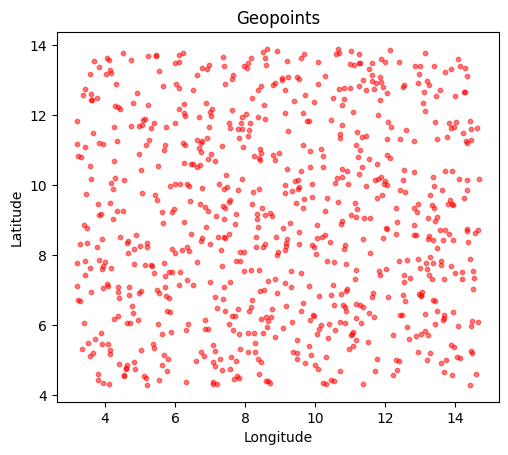

In [ ]:
gdf.plot(markersize=10, color='red', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geopoints')
plt.show()

Creating buffers from a copy of the Geodataframe

In [ ]:
buffers = gdf.copy()
#buffers['geometry']= gdf.buffer(0.10)

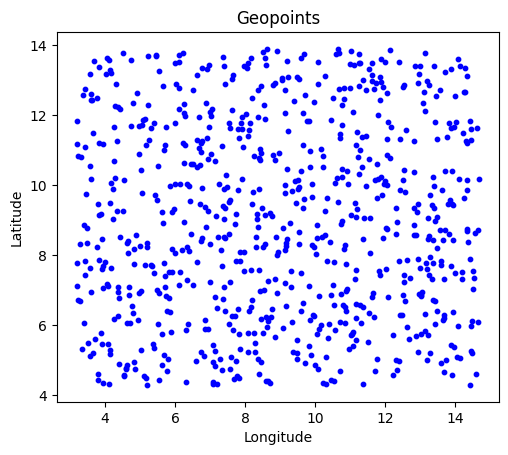

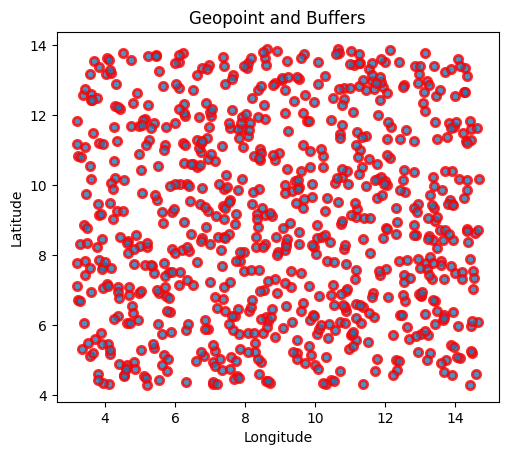

In [ ]:
gdf.plot(color='blue', markersize=10, label='Geopoints' )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geopoints')
buffers.plot(edgecolor='red', linewidth=2, label='Buffers', alpha=0.8 )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geopoint and Buffers')
plt.show()

Initializing a map centered at the location of the first row in the geodataframe while iterating through the points for each location.

In [ ]:
m = folium.Map(location=[df_geo['Latitude'].iloc[0], df_geo['Longitude'][0]])
for index,row in df_geo.iterrows():
  folium.Marker([row['Latitude'], row['Longitude']], popup=row['Facility Type']).add_to(m)
m

In [ ]:
color_mapping={'Hospital': 'red', 'Primary Care Center': 'purple',
               'Specialized Healthcare Center':'orange', 'Pharmacy':'black'  }

Customizing the map with colors for each facilities

In [ ]:
m = folium.Map(location=[df_geo['Latitude'].iloc[0], df_geo['Longitude'][0]])
for index, row in df_geo.iterrows():
  facility_type=row['Facility Type']
  if facility_type in color_mapping:
    color=color_mapping[facility_type]
  else:
    color='grey'
  folium.Marker([row['Latitude'], row['Longitude']], popup=row['Facility Type'],
                icon=folium.Icon(color=color)).add_to(m)
m

Filtering the map to only hospital and pharmacy

In [ ]:
m = folium.Map(location=[df_geo['Latitude'].iloc[0], df_geo['Longitude'].iloc[0]])
facility_types_to_visualize = ['Hospital', 'Pharmacy']
filtered_df = df_geo[df_geo['Facility Type'].isin(facility_types_to_visualize)]

for index, row in filtered_df.iterrows():
  facility_type =row['Facility Type']
  if facility_type in color_mapping:
    color=color_mapping.get(facility_type, 'grey')
  #else:
    #color='grey'
  folium.Marker([row['Latitude'], row['Longitude']], popup=row['Facility Type'],
                 icon=folium.Icon(color=color)).add_to(m)
m

Creating clusters on the map for the facilities

In [ ]:
from folium.plugins import MarkerCluster

In [ ]:
m= folium.Map(location=[df_geo['Latitude'].iloc[0], df_geo['Longitude'].iloc[0]])

In [ ]:
marker_cluster = MarkerCluster().add_to(m)

In [ ]:
for index, row in df_geo.iterrows():
  marker=folium.Marker([row['Latitude'], row['Longitude']], popup=row['Facility Type'])
  marker.add_to(marker_cluster)

#marker_cluster.add_to(m)
m

Saving the Notebook

In [45]:
import IPython
IPython.display.display(IPython.display.Javascript('IPython.notebook.save_checkpoint();'))


<IPython.core.display.Javascript object>